# Lesson

In [7]:
import nltk
# needed this to work in jupyter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/helgy8/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

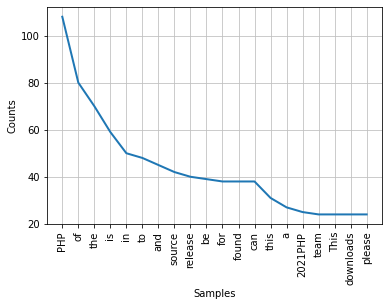

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
from bs4 import BeautifulSoup

import urllib.request

import nltk

from nltk.corpus import stopwords

response = urllib.request.urlopen('http://php.net/')

html = response.read()

soup = BeautifulSoup(html,"html5lib")

text = soup.get_text(strip=True)

tokens = [t for t in text.split()]
freq = nltk.FreqDist(tokens)

freq.plot(20, cumulative=False)

In [9]:
clean_tokens = tokens[:]

sr = stopwords.words('english')

for token in tokens:

    if token in stopwords.words('english'):

        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():

    print (str(key) + ':' + str(val))


PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUser:1
Submitted:1
DataHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
BehaviourAudio:1
Formats:1
ManipulationAuthentica

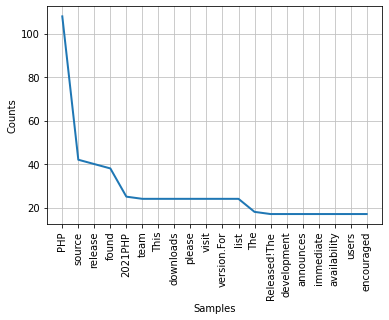

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
freq.plot(20, cumulative=False)

# Exercise

### stopwords not removed

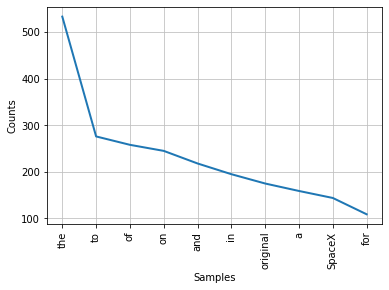

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# https://en.wikipedia.org/wiki/SpaceX

# get html
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')

htmlSp = response.read()

soupSp = BeautifulSoup(htmlSp,"html5lib")

# get text
textSp = soupSp.get_text(strip=True)

# get tokens
tokensSp = [t for t in textSp.split()]
# create distribution of top 10
freqSp = nltk.FreqDist(tokens)

freqSp.plot(10, cumulative=False)

### removed stopwords

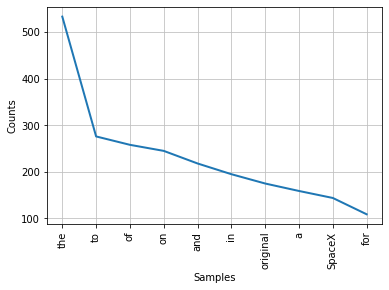

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
clean_tokensSp = tokensSp[:]

sr = stopwords.words('english')

# strip stop words

for token in tokensSp:

    if token in stopwords.words('english'):

        clean_tokensSp.remove(token)

# do another distribution
freqSp = nltk.FreqDist(clean_tokens)

freqSp.plot(10, cumulative=False)

In [28]:
# get list of top 10 tokens
values = list(freqSp.items())
values = sorted(values, key=lambda x: x[1], reverse=True)[:10]
print(values)


[('the', 533), ('to', 276), ('of', 258), ('on', 245), ('and', 218), ('in', 195), ('original', 175), ('a', 159), ('SpaceX', 144), ('for', 109)]


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'original'),
  Text(2, 0, 'SpaceX'),
  Text(3, 0, 'launch'),
  Text(4, 0, 'Falcon'),
  Text(5, 0, 'Retrieved1'),
  Text(6, 0, 'first'),
  Text(7, 0, '9'),
  Text(8, 0, 'Space'),
  Text(9, 0, 'May'),
  Text(10, 0, 'March')])

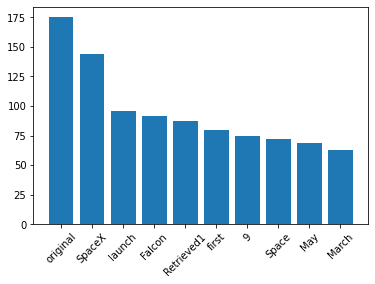

In [25]:
import matplotlib.pyplot as plt

# create values for bar chart
x = range(1, len(values) + 1)
labels = [tup[0] for tup in values]
y = [tup[1] for tup in values]

# plot and rotate ticks
plt.bar(x, y, tick_label=labels)
plt.xticks(rotation=45)


# Question 1
## Why we use stopwords? Why stopwords are not necessary for NLP frequency distribution.

We use stopwords in english because they make the language sound more consitent and provide meaning, which is likely the same for other languages as well. Most articles separate between general instances of a noun and specific instances for context, and most prepostions give directionality to verbs. This level of detail is not completely necessary for summarization or sentiment analysis. When we only want to see how often words are used, these words will show as high frequency, but they give no meaning without the specific nouns they are attached to, so we should focus on those instead.

# Question 2
## Based on high frequency words what information you can extract from the graph?

Based on the highest frequency words, this article appears to be talking about the first spaceX rocket, the Falcon 9, which had it's coronative launch in March and was retrieved in May. I say all of this as a guess, but that is the meaning that I personally extract from this summariztion of frequently used words. 
With certainty, this article is about SpaceX's Falcon 9 rocket being some kind of original, it was launched and retrieved, and we can assume the important dates are in March and May, though I am not sure what took place when. 

# Question 3
## Can you provide different visualization for frequency distribution? If yes, please perform. If no, why?

Yes, a bar chart is used to show the same data, which seems more relevant, though more tedious to code. 